# Data Understanding 

# Hypothesis

Null: is no significant association between churn and contract 
Alternative: There is significant association between churn and contract

# 5 Analystic Question 

1. How does gender impact customer churn? Are there significant differences in churn rates between male and female customers?

2. Does the presence of a partner or dependents influence customer churn? Is there a relationship between marital status and churn behavior?

3. How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customers?


4. What role do additional services (e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likely to churn?

5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?



## Step 1 and 2 - Install our packages 

In [1]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install -upgrade pyodbc

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Step 3 - Import all the necessary packages

In [4]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

### Step 4 - Create your .env file in the root of your project
#### Step 5 - In the .env file, put all your sensitive information like server name, password etc
#### Step 6 & 7 - Next create a .gitignore file and type '/.env' file we just created. This will prevent git from tracking that file.
#### Step 8 - Create a connection by accessing your connection string with your defined environment variables

In [5]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [6]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

# Data for the Project
First dataset - First 3000 records of the dataset was extracted from Microsoft SQL Server
Second dataset - The second 2000 records of the dataset was downloaded from OneDrive
Third dataset - The third part of the data was downloaded from a GitHub Repository

In [7]:
# Now the sql query to get the data is what what you see below. 


query = "Select * from dbo.LP2_Telco_churn_first_3000"
data = pd.read_sql(query, connection)

## Data Preprocessing
* In the data preprocessing phase, we check the columns, shape, and information on the data to understand its dimensions. 
* We then check for null values in the dataset and impute or remove them depending on the circumstances
* Also we perform a check for duplicaate values and replace them to ensure data integrity

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [9]:
data2 = pd.read_excel("Telco-churn-second-2000.xlsx")
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [10]:
data3 = pd.read_csv("LP2_Telco-churn-last-2000.csv")
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [14]:
data.shape

(3000, 21)

In [15]:
data2.shape

(2000, 20)

In [16]:
data3.shape

(2043, 21)

In [17]:
# Compare the two DataFrames data1 and data2 side-by-side

# Create custom summary DataFrames for each DataFrame
summary_data = pd.DataFrame({'Column Name': data.columns, 'Data Type': data.dtypes, 'Non-Null Count': data.count()})
summary_data3= pd.DataFrame({'Column Name': data3.columns, 'Data Type': data3.dtypes, 'Non-Null Count': data3.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data.set_index('Column Name', inplace=True)
summary_data3.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data, summary_data3], axis=1, keys=['DataFrame 1', 'DataFrame 2'])

# Print the side-by-side comparison
print(comparison)

                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           3000      object           2043
gender                object           3000      object           2043
SeniorCitizen           bool           3000       int64           2043
Partner                 bool           3000      object           2043
Dependents              bool           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService            bool           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
Device

From the above, we can see that data2 
Both have the same column names 
There are different data types.
There Dataframe 2 has no missing data. However, data1 shown in Dataframe 1 has some missing data.
There are different datatypes



## Data Preprocessing
* In the data preprocessing phase, we check the columns, shape, and information on the data to understand its dimensions. 
* We then check for null values in the dataset and impute or remove them depending on the circumstances
* Also we perform a check for duplicaate values and replace them to ensure data integrity


# Cleaning column 

# CustomerID

In [18]:
#Preview data 'customerID column

data['customerID'].head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

In [19]:
#Preview data3 'customerID column

data3['customerID'].head()

0    5600-PDUJF
1    8292-TYSPY
2    0567-XRHCU
3    1867-BDVFH
4    2067-QYTCF
Name: customerID, dtype: object

Both 'customerID' columns look good. 
Preview 'gender' column of both data and clean if there are inconsistencies

# Gender 

In [20]:
data['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [21]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
data3['gender'].head()

0      Male
1      Male
2    Female
3      Male
4    Female
Name: gender, dtype: object

In [23]:
data3['gender'].unique()

array(['Male', 'Female'], dtype=object)

The 'gender' column for both data looks clean. 


# SeniorCitizen

From Data Understanding document:
* SeniorCitizen -- Whether a customer is a senior citizen or not

There are no missing data but the datatype is different. data1 is a boolean while data2 is made up of integers

In [24]:
data['SeniorCitizen'].unique()

array([False,  True])

In [25]:
data3['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [26]:
# Convert the binary column to boolean datatype
data3['SeniorCitizen'] = data3['SeniorCitizen'].astype(bool)

In [27]:
data3['SeniorCitizen'].unique()

array([False,  True])

The 'SeniorCitizen' column is clean now.


# Partner 

Convert data2['Partner'] to boolean datatype to reflect Data understanding documentation

* Whether the customer has a partner or not (Yes, No)

In [28]:
data3['Partner'].head()

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Partner, dtype: object

In [29]:
data['Partner'].head()

0     True
1    False
2    False
3    False
4    False
Name: Partner, dtype: bool

In [30]:
#Replace 'Yes' or 'No' with True or False

data3['Partner'].replace('Yes', True, inplace=True)
data3['Partner'].replace('No', False, inplace=True)
data3['Partner'].head()

0    False
1    False
2     True
3     True
4     True
Name: Partner, dtype: bool

# Dependent 
Convert to reflect readme documentation on data understanding
* Dependents -- Whether the customer has dependents or not (Yes, No)

Check 'Dependent' column of inconsistencies. 

In [31]:
data['Dependents'].head()

0    False
1    False
2    False
3    False
4    False
Name: Dependents, dtype: bool

In [32]:
data['Dependents'].head()

0    False
1    False
2    False
3    False
4    False
Name: Dependents, dtype: bool

In [33]:
data3['Dependents'].head()

0     No
1     No
2    Yes
3    Yes
4     No
Name: Dependents, dtype: object

In [34]:
#Replace 'Yes' or 'No' with True or False

data3['Dependents'].replace('Yes', True, inplace=True)
data3['Dependents'].replace('No', False, inplace=True)
data3['Dependents'].head()

0    False
1    False
2     True
3     True
4    False
Name: Dependents, dtype: bool

# Tenure

In [35]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [36]:
data3['tenure'].unique()

array([ 6, 19, 69, 11, 64, 39, 15, 25, 66, 61, 43, 12, 23, 71, 34,  5, 41,
       72, 14,  1, 10,  7,  9, 48, 20, 16,  2, 22, 35, 54, 56, 18, 68, 53,
       30, 36, 55, 21, 33, 44,  4, 49, 42, 67, 40, 45, 57,  8, 65,  3, 17,
       28, 52, 47, 50, 46, 29, 27, 13, 24, 62, 26, 60, 51, 70, 59, 38, 37,
        0, 58, 31, 32, 63], dtype=int64)

# PhoneServices
Convert to reflect readme documentation on data understanding

* Phone Service -- Whether the customer has a phone service or not (Yes, No)

In [37]:
data['PhoneService'].head()

0    False
1     True
2     True
3    False
4     True
Name: PhoneService, dtype: bool

In [38]:
data3['PhoneService'].head()

0    Yes
1    Yes
2     No
3    Yes
4    Yes
Name: PhoneService, dtype: object

In [39]:
#Replace 'Yes' or 'No' with True or False

data2['PhoneService'].replace('Yes', True, inplace=True)
data2['PhoneService'].replace('No', False, inplace=True)
data2['PhoneService'].head()

0    True
1    True
2    True
3    True
4    True
Name: PhoneService, dtype: bool

# MultipleLines
data1 has some missing values about 8.9%
impute with mode

In [40]:
#confirm number of missing values

data['MultipleLines'].isnull().sum()

269

In [41]:
data['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [42]:
data['MultipleLines'].value_counts()

MultipleLines
False    1437
True     1294
Name: count, dtype: int64

In [43]:
#impute missing values with mode
mode_multiplelines = data['MultipleLines'].mode()[0]

data['MultipleLines'].fillna(mode_multiplelines, inplace=True)
data['MultipleLines'].isnull().sum()

0

In [44]:
data['MultipleLines'].value_counts()

MultipleLines
False    1706
True     1294
Name: count, dtype: int64

In [45]:
data3['MultipleLines'].unique()

array(['No', 'No phone service', 'Yes'], dtype=object)

In [46]:
data3['MultipleLines'].head()

0                  No
1                  No
2    No phone service
3                 Yes
4                 Yes
Name: MultipleLines, dtype: object

In [47]:
data3['MultipleLines'].value_counts()

MultipleLines
No                  987
Yes                 836
No phone service    220
Name: count, dtype: int64

In [48]:
#we assume that an answer of 'No phone service' is the same as No, since a customer without phone service will have not need for multiplelines

# Replace 'No phone service' with 'No' in the 'MultipleLines' column
data3['MultipleLines'].replace('No phone service', 'No', inplace=True)
data3['MultipleLines'].value_counts()

MultipleLines
No     1207
Yes     836
Name: count, dtype: int64

In [49]:
#confirm number of missing values

data3['MultipleLines'].isnull().sum()

0

In [50]:
data3['MultipleLines'].value_counts()

MultipleLines
No     1207
Yes     836
Name: count, dtype: int64

In [51]:
data3['MultipleLines'].replace('Yes', True, inplace=True)
data3['MultipleLines'].replace('No', False, inplace=True)
data3['MultipleLines'].head()

0    False
1    False
2    False
3     True
4     True
Name: MultipleLines, dtype: bool

In [52]:
data3['MultipleLines'].value_counts()

MultipleLines
False    1207
True      836
Name: count, dtype: int64

In [53]:
data3['MultipleLines'].unique()

array([False,  True])

In [54]:
data['MultipleLines'].unique()

array([False,  True])

# InternetServices

In [55]:
data['InternetService'].isnull().sum()

0

In [56]:
data['InternetService'].nunique()

3

In [57]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [58]:
data3['InternetService'].nunique()

3

In [59]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

'InternetService' column is clean


# OnlineSecurity
OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

In [60]:
data['OnlineSecurity'].unique()

array([False, True, None], dtype=object)

In [61]:


data['OnlineSecurity'].value_counts()

OnlineSecurity
False    1478
True      871
Name: count, dtype: int64

In [62]:
data['OnlineSecurity'].isnull().sum()

651

In [63]:
# We assume the missing data is a response to the third option 'No Internet'. Hence will fill missing with 'No Internet'
# Impute missing values with 'No Internet'.


data['OnlineSecurity'].fillna('No Internet', inplace=True)
data['OnlineSecurity'].value_counts()

OnlineSecurity
False          1478
True            871
No Internet     651
Name: count, dtype: int64

In [64]:

data3['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [65]:
data3['OnlineSecurity'].value_counts()

OnlineSecurity
No                     1029
Yes                     585
No internet service     429
Name: count, dtype: int64

In [66]:
# Replace 'No internet service' with 'No Internet' in the 'MultipleLines' column
data3['OnlineSecurity'].replace('No internet service', 'No Internet', inplace=True)
data3['OnlineSecurity'].value_counts()

OnlineSecurity
No             1029
Yes             585
No Internet     429
Name: count, dtype: int64

# OnlineBackup
* OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

In [67]:
data['OnlineBackup'].isnull().sum()

651

In [68]:
data['OnlineBackup'].unique()

array([True, False, None], dtype=object)

In [69]:
data3['OnlineBackup'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [70]:
# Replace 'False' with 'No' and 'True' with 'Yes' the 'OnlineBackup' column
# Fill missing values with 'No Internet'

data['OnlineBackup'].replace(True, 'Yes', inplace=True)
data['OnlineBackup'].replace(False, 'No', inplace=True)

data['OnlineBackup'].fillna('No Internet', inplace=True)
data['OnlineBackup'].value_counts()

OnlineBackup
No             1320
Yes            1029
No Internet     651
Name: count, dtype: int64

In [71]:

# Replace 'No internet service' with 'No Internet'

data3['OnlineBackup'].replace('No internet service', 'No Internet', inplace=True)
data3['OnlineBackup'].unique()

array(['No', 'Yes', 'No Internet'], dtype=object)

DeviceProtection column
DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

In [72]:

data['DeviceProtection'].unique()

array([False, True, None], dtype=object)

In [73]:
data['DeviceProtection'].isnull().sum()

651

In [74]:
# Replace 'False' with 'No' and 'True' with 'Yes' the 'Deviceprotection' column
# Fill missing values with 'No Internet'

data['DeviceProtection'].replace(True, 'Yes', inplace=True)
data['DeviceProtection'].replace(False, 'No', inplace=True)

data['DeviceProtection'].fillna('No internet service', inplace=True)
data['DeviceProtection'].value_counts()

DeviceProtection
No                     1296
Yes                    1053
No internet service     651
Name: count, dtype: int64

In [75]:
data3['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

# TechSupport
TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

In [76]:
data['TechSupport'].unique()

array([False, True, None], dtype=object)

In [77]:
data['TechSupport'].replace(True, 'Yes', inplace=True)
data['TechSupport'].replace(False, 'No', inplace=True)

data['TechSupport'].fillna('No internet', inplace=True)
data['TechSupport'].value_counts()

TechSupport
No             1476
Yes             873
No internet     651
Name: count, dtype: int64

In [78]:
data['TechSupport'].isnull().sum()

0

In [79]:
data3['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [80]:
data3['TechSupport'].replace('No internet service', 'No internet', inplace=True)
data3['TechSupport'].unique()

array(['Yes', 'No', 'No internet'], dtype=object)

# StreamingTV column
StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

In [81]:
data['StreamingTV'].unique()

array([False, True, None], dtype=object)

In [82]:
data['StreamingTV'].replace(True, 'Yes', inplace=True)
data['StreamingTV'].replace(False, 'No', inplace=True)

data['StreamingTV'].fillna('No internet service', inplace=True)
data['StreamingTV'].value_counts()

StreamingTV
No                     1190
Yes                    1159
No internet service     651
Name: count, dtype: int64

In [83]:
data3['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

# StreamingMovies column
StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

In [84]:
data['StreamingMovies'].unique()

array([False, True, None], dtype=object)

In [85]:
data3['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [86]:
data['StreamingMovies'].replace(True, 'Yes', inplace=True)
data['StreamingMovies'].replace(False, 'No', inplace=True)

data['StreamingMovies'].fillna('No internet service', inplace=True)
data['StreamingMovies'].value_counts()

StreamingMovies
Yes                    1199
No                     1150
No internet service     651
Name: count, dtype: int64

 # Contract column

In [87]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [88]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

# PaperlessBilling column

* PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

In [89]:
data['PaperlessBilling'].unique()

array([ True, False])

In [90]:
data3['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [91]:
data['PaperlessBilling'].replace(True, 'Yes', inplace=True)
data['PaperlessBilling'].replace(False, 'No', inplace=True)
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

# PaymentMethod column

In [92]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [93]:
data3['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

# MonthlyCharges column

In [94]:
data['MonthlyCharges'].head()

0    29.850000
1    56.950001
2    53.849998
3    42.299999
4    70.699997
Name: MonthlyCharges, dtype: float64

In [95]:
#convert to 2 decimal places

data['MonthlyCharges'] = data['MonthlyCharges'].round(2)
data['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

In [96]:
data3['MonthlyCharges'].head()

0     49.50
1     55.00
2     43.95
3     74.35
4    111.15
Name: MonthlyCharges, dtype: float64

# TotalCharges column

In [97]:
data['TotalCharges'].head()

0      29.850000
1    1889.500000
2     108.150002
3    1840.750000
4     151.649994
Name: TotalCharges, dtype: float64

In [98]:
data['TotalCharges'] = data['TotalCharges'].round(2)
data['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [99]:
data['TotalCharges'].isnull().sum()

5

In [100]:
# Drop rows with any missing values in the TotalCharges column
data.dropna(subset='TotalCharges', inplace=True)
data['TotalCharges'].isnull().sum()

0

In [101]:
data['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [102]:
data3['TotalCharges'].head()

0     312.7
1    1046.5
2    2960.1
3     834.2
4    6953.4
Name: TotalCharges, dtype: object

In [103]:
# Convert the TotalCharges column to float datatype
data3['TotalCharges'] = pd.to_numeric(data3['TotalCharges'], errors='coerce').astype(float)

# Round the values to 2 decimal places
data3['TotalCharges'] = data3['TotalCharges'].round(2)
data3['TotalCharges'].head()

0     312.7
1    1046.5
2    2960.1
3     834.2
4    6953.4
Name: TotalCharges, dtype: float64

# Churn column

In [104]:
data['Churn'].isnull().sum()

1

In [105]:
data['Churn'].unique()

array([False, True, None], dtype=object)

In [106]:
# Drop rows with any missing values in the Churn column
data.dropna(subset='Churn', inplace=True)
data['Churn'].isnull().sum()

0

In [107]:
data['Churn'].unique()

array([False, True], dtype=object)

In [108]:
data['Churn'].replace(True, 'Yes', inplace=True)
data['Churn'].replace(False, 'No', inplace=True)
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [109]:
data3['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [110]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   bool   
 3   Partner           2043 non-null   bool   
 4   Dependents        2043 non-null   bool   
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   bool   
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2994 non-null   object 
 1   gender            2994 non-null   object 
 2   SeniorCitizen     2994 non-null   bool   
 3   Partner           2994 non-null   bool   
 4   Dependents        2994 non-null   bool   
 5   tenure            2994 non-null   int64  
 6   PhoneService      2994 non-null   bool   
 7   MultipleLines     2994 non-null   bool   
 8   InternetService   2994 non-null   object 
 9   OnlineSecurity    2994 non-null   object 
 10  OnlineBackup      2994 non-null   object 
 11  DeviceProtection  2994 non-null   object 
 12  TechSupport       2994 non-null   object 
 13  StreamingTV       2994 non-null   object 
 14  StreamingMovies   2994 non-null   object 
 15  Contract          2994 non-null   object 
 16  PaperlessBilling  2994 non-null   object 
 17  

In [112]:
data.to_csv('clean_data.csv', index=False)
data3.to_csv('clean_data3.csv', index=False)

In [113]:
#combine data and data since they are the train dataset
#covert to csv file and store as 'train.csv'

df=pd.concat([data,data3])
df.to_csv('train.csv', index=False)

In [114]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5037 non-null   object 
 1   gender            5037 non-null   object 
 2   SeniorCitizen     5037 non-null   bool   
 3   Partner           5037 non-null   bool   
 4   Dependents        5037 non-null   bool   
 5   tenure            5037 non-null   int64  
 6   PhoneService      5037 non-null   object 
 7   MultipleLines     5037 non-null   bool   
 8   InternetService   5037 non-null   object 
 9   OnlineSecurity    5037 non-null   object 
 10  OnlineBackup      5037 non-null   object 
 11  DeviceProtection  5037 non-null   object 
 12  TechSupport       5037 non-null   object 
 13  StreamingTV       5037 non-null   object 
 14  StreamingMovies   5037 non-null   object 
 15  Contract          5037 non-null   object 
 16  PaperlessBilling  5037 non-null   object 
 17  

In [116]:
df['TotalCharges'].isnull().sum()

3

In [117]:
#look at the rows with missing values
# Create a boolean mask for rows with missing values
missing_values_mask = df.isnull().any(axis=1)

# Use boolean indexing to filter and display rows with missing values
rows_with_missing_values = df[missing_values_mask]

print(rows_with_missing_values)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
218   2923-ARZLG    Male          False     True        True       0   
1670  4075-WKNIU  Female          False     True        True       0   
1754  2775-SEFEE    Male          False    False        True       0   

     PhoneService  MultipleLines InternetService OnlineSecurity  ...  \
218           Yes          False              No    No Internet  ...   
1670          Yes           True             DSL             No  ...   
1754          Yes           True             DSL            Yes  ...   

         DeviceProtection  TechSupport          StreamingTV  \
218   No internet service  No internet  No internet service   
1670                  Yes          Yes                  Yes   
1754                   No          Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
218   No internet service  One year              Yes   
1670                   No  Two year               No   
1

In [118]:
# Drop rows with any missing values across all columns
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5034 non-null   object 
 1   gender            5034 non-null   object 
 2   SeniorCitizen     5034 non-null   bool   
 3   Partner           5034 non-null   bool   
 4   Dependents        5034 non-null   bool   
 5   tenure            5034 non-null   int64  
 6   PhoneService      5034 non-null   object 
 7   MultipleLines     5034 non-null   bool   
 8   InternetService   5034 non-null   object 
 9   OnlineSecurity    5034 non-null   object 
 10  OnlineBackup      5034 non-null   object 
 11  DeviceProtection  5034 non-null   object 
 12  TechSupport       5034 non-null   object 
 13  StreamingTV       5034 non-null   object 
 14  StreamingMovies   5034 non-null   object 
 15  Contract          5034 non-null   object 
 16  PaperlessBilling  5034 non-null   object 
 17  

In [119]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5034.000000,5034.000000,5034.000000
mean,32.620580,65.107251,2300.954758
std,24.511015,30.068019,2268.346401
min,1.000000,18.400000,18.800000
25%,9.000000,35.800000,417.662500
50%,29.000000,70.600000,1401.000000
75%,56.000000,90.050000,3860.600000
max,72.000000,118.650000,8670.100000


In [120]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2038,6840-RESVB,Male,False,True,True,24,Yes,True,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2039,2234-XADUH,Female,False,True,True,72,Yes,True,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
2040,4801-JZAZL,Female,False,True,True,11,No,False,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,True,True,False,4,Yes,True,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
2042,3186-AJIEK,Male,False,False,False,66,Yes,False,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


## Exploratory Data Analysis: EDA

Univariate Analysis

## Frequency Distribution Analysis
This analysis is used to analyze continuous numerical data.

In [121]:
df['MonthlyCharges'].describe()

count    5034.000000
mean       65.107251
std        30.068019
min        18.400000
25%        35.800000
50%        70.600000
75%        90.050000
max       118.650000
Name: MonthlyCharges, dtype: float64

Text(0.5, 1.0, 'Distribution of Monthly Charges')

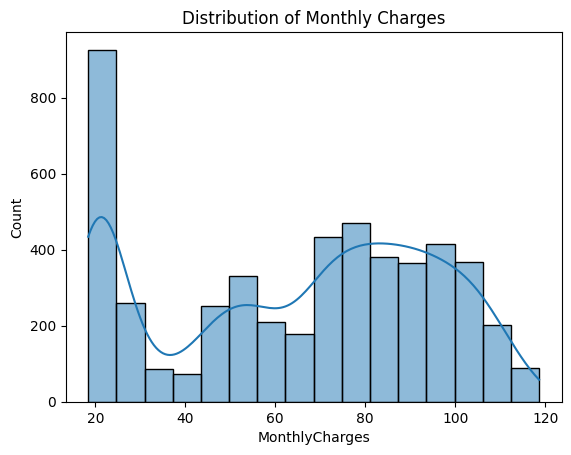

In [122]:
# Create the histogram plot of Monthly charges using seaborn

sns.histplot(data=df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')

TotalCharges column

In [123]:
df['TotalCharges'].describe()

count    5034.000000
mean     2300.954758
std      2268.346401
min        18.800000
25%       417.662500
50%      1401.000000
75%      3860.600000
max      8670.100000
Name: TotalCharges, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Charges')

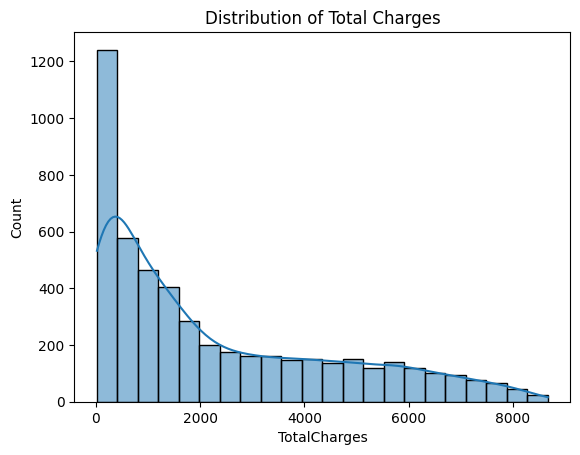

In [124]:
#sns.histplot(data=df['TotalCharges'], kde=True)

# Create the histogram plot using seaborn
sns.histplot(data=df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')

The above visualization depicts that charges below 2000 had highest frequency and most charged to the customers of the telecommunications company. The total charged values are skewed and have high variability/range.

Gender

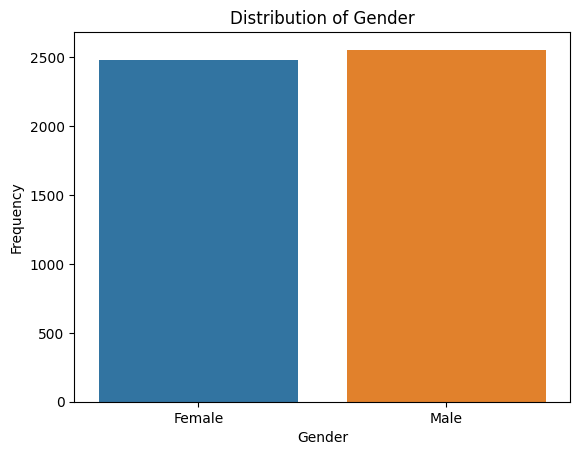

In [125]:
#Plot of Gender Distribution
sns.countplot(x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

Gender distribution is almost even, with Males exceeding females by a very small margin

Payment Method column

In [147]:
# Visualization of Payment Method column

PaymentMethod_Count = df['PaymentMethod'].value_counts().sort_values(ascending=True)
PaymentMethod_Count 

PaymentMethod
Credit card (automatic)      1089
Mailed check                 1123
Bank transfer (automatic)    1123
Electronic check             1699
Name: count, dtype: int64

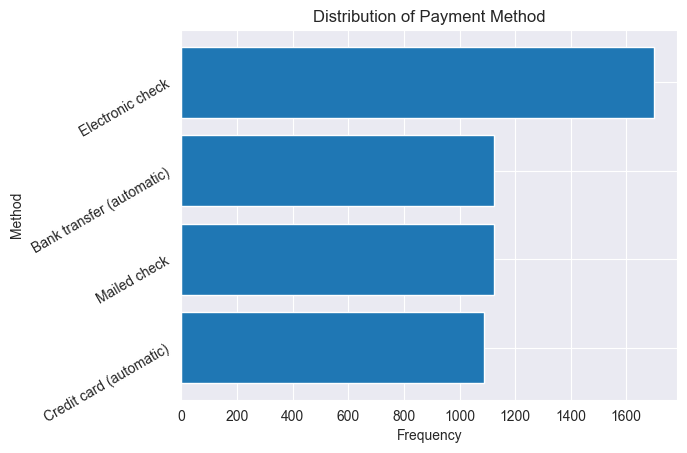

In [150]:
#Use of horizontal bar plot for visualization
#c = ['red', 'blue','yellow','green']
plt.barh(PaymentMethod_Count.index, PaymentMethod_Count.values)
plt.xlabel('Frequency')
plt.ylabel('Method')
plt.title('Distribution of Payment Method')
plt.yticks(rotation=30)
plt.show();

Vizualization shows us that majority of the customers preffered Electronic Check as a method of payment.

 InternetService Column

In [128]:
# Visualization of InternetService column
df['InternetService'].replace('No', 'No Internet Service', inplace=True)

InternetService_Count = df['InternetService'].value_counts().sort_values(ascending=True)
InternetService_Count 

InternetService
No Internet Service    1077
DSL                    1710
Fiber optic            2247
Name: count, dtype: int64

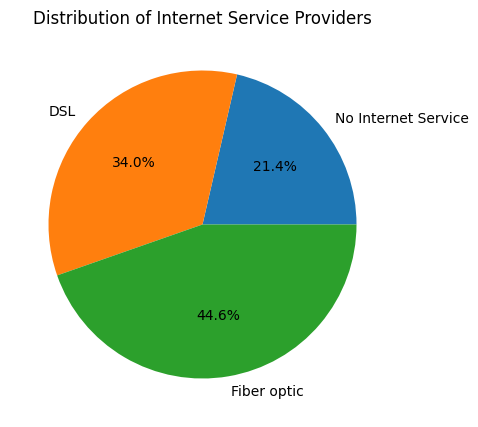

In [129]:
#Plotting a pie chart
#Should discuss with my team what'No' represents

plt.figure(figsize=(5, 5))
plt.pie(InternetService_Count, labels=InternetService_Count.index, autopct='%1.1f%%')
plt.title('Distribution of Internet Service Providers')
plt.show();

Majority of customer's preffered Fibre optic for internet service provision

 #Contract column

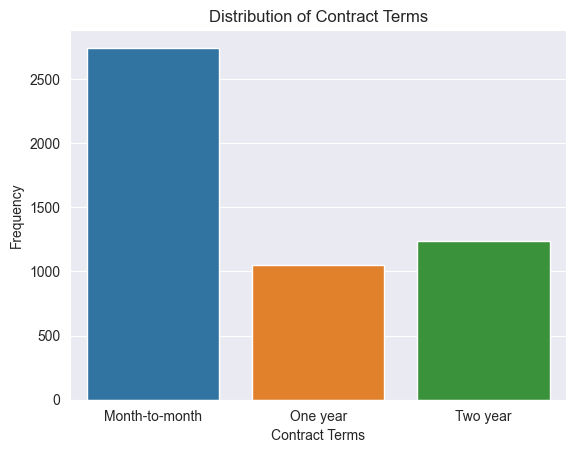

In [130]:
#Use of count plot for visualization
sns.set_style('darkgrid')
sns.countplot(data=df, x='Contract')
plt.xlabel('Contract Terms')
plt.ylabel('Frequency')
plt.title('Distribution of Contract Terms')
#plt.xticks(rotation=25)
plt.show();

# SeniorCitizen

In [143]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
False    4215
True      819
Name: count, dtype: int64

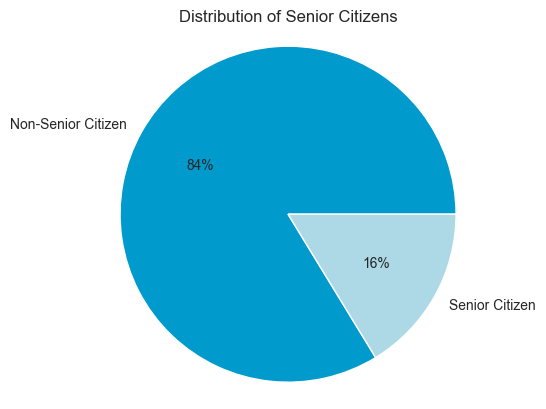

In [144]:
# Count and create pie chart of the 'SeniorCitizen' column

senior_citizen_counts = df['SeniorCitizen'].value_counts()
labels = ['Non-Senior Citizen', 'Senior Citizen']

counts = [senior_citizen_counts[0], senior_citizen_counts[1]]
colors = ['#009ACD', '#ADD8E6']

plt.pie(counts, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False)
plt.axis('equal')

plt.title('Distribution of Senior Citizens')

plt.show()

# Contract

In [ ]:
df['Contract'].unique()

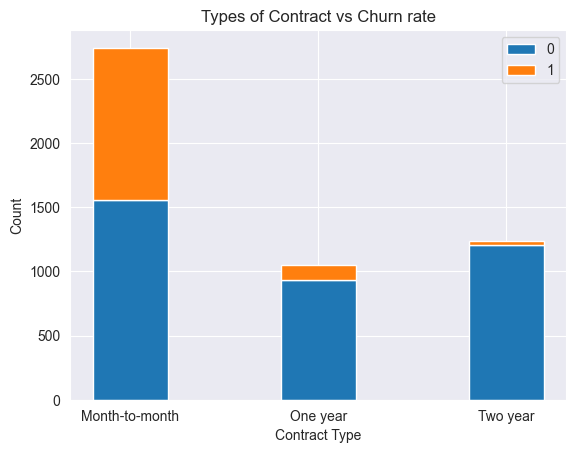

In [145]:
# Grouping and counting occurrences of each combination
grouped_df = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots()

index = range(len(grouped_df))
width = 0.4

bars = []
bottom = [0] * len(grouped_df)

for churn_status in grouped_df.columns:
    bar = ax.bar(index, grouped_df[churn_status], width, bottom=bottom, label=churn_status)
    bars.append(bar)
    bottom = [bottom[i] + grouped_df[churn_status][i] for i in range(len(grouped_df))]

ax.set_xlabel('Contract Type')
ax.set_ylabel('Count')
ax.set_title('Types of Contract vs Churn rate')
ax.set_xticks(index)
ax.set_xticklabels(grouped_df.index)
ax.legend()

plt.show()

# 

##1.How does gender impact customer churn? Are there siginificant differences in churn rates between male and female customers?

In [131]:
# Since the  gender column contains 'Male' and 'Female', convert it to categorical data
df['gender'] = pd.Categorical(df['gender'])

In [132]:

# Assuming 'churn' column contains non-numeric values like 'Yes' and 'No'
# Convert 'churn' column to binary numeric values (0 for 'No', 1 for 'Yes')
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
#calculate the chun rates by  gender

Churn_rates_by_gender = df.groupby('gender')['Churn'].mean()

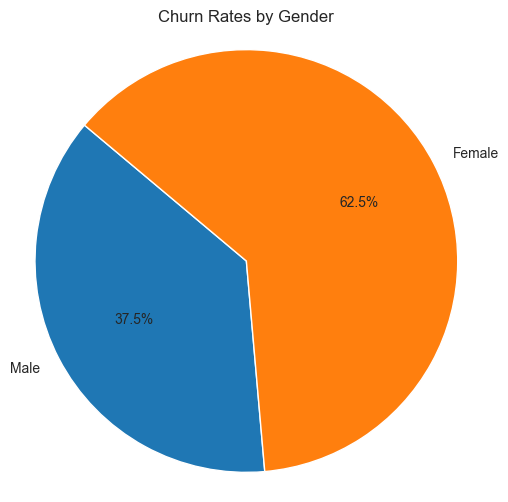

In [133]:
# Assuming you have already calculated the churn rates by gender
churn_rates_by_gender = pd.Series([0.15, 0.25], index=['Male', 'Female'])  # Replace with your actual churn rates

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_rates_by_gender.values, labels=churn_rates_by_gender.index, autopct='%1.1f%%', startangle=140)

plt.title('Churn Rates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

There was  siginificant differences in churn rates between male and female customers

##2. Does the presence of a partner or dependents influence customer churn? Is there a relationship between marital status and churn behavior? 

In [134]:
Churn_rates_by_partner = df.groupby('Partner')['Churn'].mean()
Churn_rates_by_dependents = df.groupby('Dependents')['Churn'].mean()

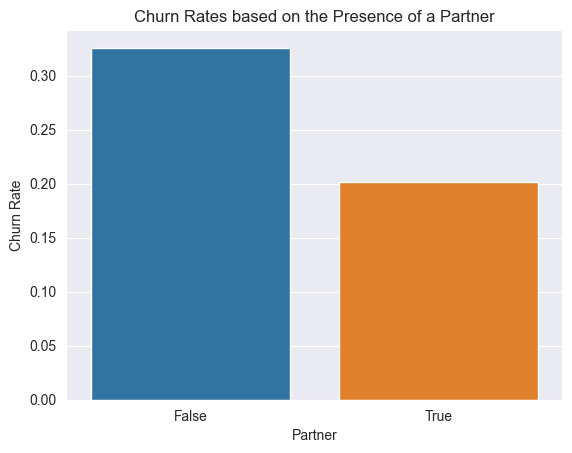

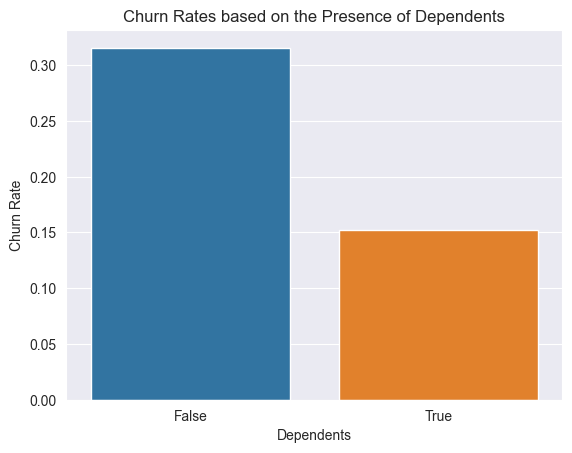

In [135]:
# Plot churn rates based on the presence of a partner
sns.barplot(x=Churn_rates_by_partner.index, y=Churn_rates_by_partner.values)
plt.title('Churn Rates based on the Presence of a Partner')
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.show()

# Plot churn rates based on the presence of dependents
sns.barplot(x=Churn_rates_by_dependents.index, y=Churn_rates_by_dependents.values)
plt.title('Churn Rates based on the Presence of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn Rate')
plt.show()







The graph shows that the relationship between partner is higher than the dependents

##3.How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customers?

In [136]:
# Assuming 'tenure' column contains the length of tenure in months
# Create bins for tenure categories (e.g., 0-6 months, 7-12 months, etc.)
tenure_bins = [0, 6, 12, 24, 36, 48, 60, 1000]  # Adjust the bins as needed
tenure_labels = ['0-6 months', '7-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61+ months']
df['tenure_category'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels)

# Calculate churn rates for each tenure category
Churn_rates_by_tenure = df.groupby('tenure_category')['Churn'].mean()

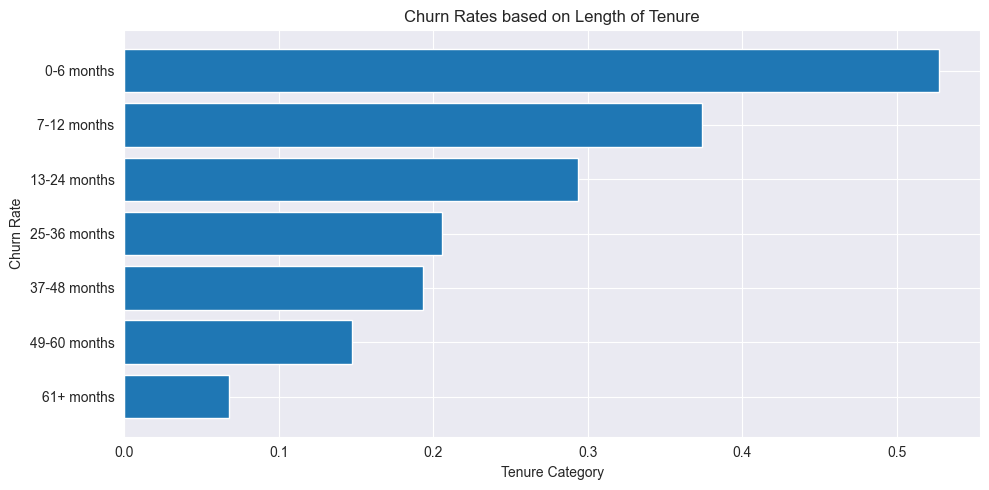

In [137]:
# lets see the distribution of the top 10 investors
plt.figure(figsize=(10, 5))
plt.barh(Churn_rates_by_tenure.index,Churn_rates_by_tenure.values)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar on top


plt.xlabel('Tenure Category')
plt.ylabel('Churn Rate')
plt.title('Churn Rates based on Length of Tenure')
plt.tight_layout()  # To prevent the labels from getting cut off
plt.show();

#The customers with longer tenures is less likely to churn compared to new  customers

##4. What role do additional services (e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likely to churn?

In [138]:
# Create bins for service categories (e.g., 0, 1, 2, etc.)
service_bins = [-1, 0, 1]  # Two categories: 0 for "No service", 1 for "Has service"
service_labels = ['No service', 'Has service']
df['Service_category_OnlineSecurity'] = pd.cut(df['OnlineSecurity'].map({'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_TechSupport'] = pd.cut(df['TechSupport'].map({'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_StreamingTV'] = pd.cut(df['StreamingTV'].map({'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_StreamingMovies'] = pd.cut(df['StreamingMovies'].map({'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)

# Calculate churn rates for each service category
churn_rates_by_OnlineSecurity = df.groupby('Service_category_OnlineSecurity')['Churn'].mean()
churn_rates_by_TechSupport = df.groupby('Service_category_TechSupport')['Churn'].mean()
churn_rates_by_StreamingTV = df.groupby('Service_category_StreamingTV')['Churn'].mean()
churn_rates_by_StreamingMovies = df.groupby('Service_category_StreamingMovies')['Churn'].mean()

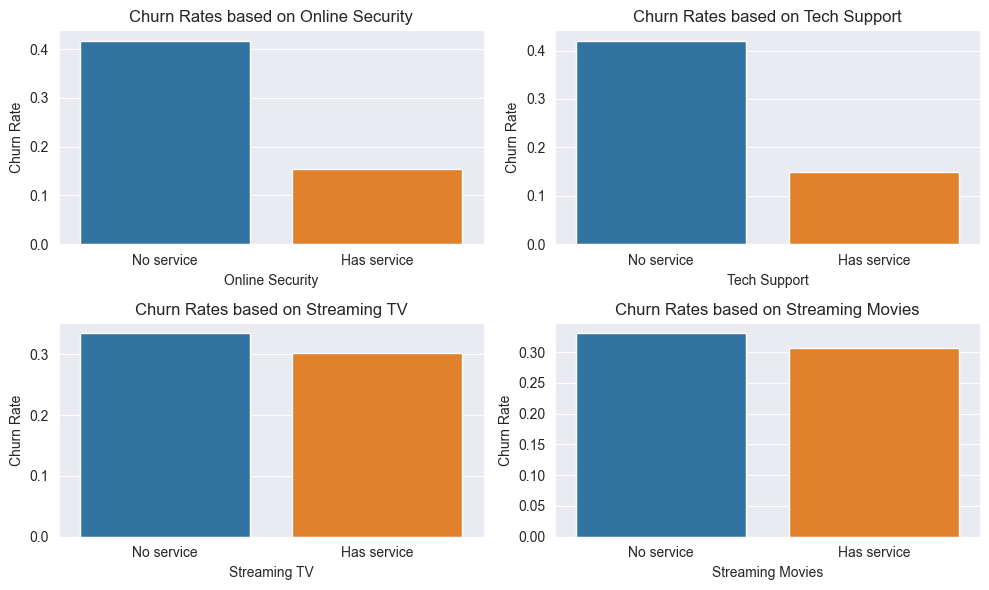

In [139]:
# Plot churn rates for each service
plt.figure(figsize=(10, 6))

plt.subplot(221)
sns.barplot(x=churn_rates_by_OnlineSecurity.index, y=churn_rates_by_OnlineSecurity.values)
plt.title('Churn Rates based on Online Security')
plt.xlabel('Online Security')
plt.ylabel('Churn Rate')

plt.subplot(222)
sns.barplot(x=churn_rates_by_TechSupport.index, y=churn_rates_by_TechSupport.values)
plt.title('Churn Rates based on Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Churn Rate')

plt.subplot(223)
sns.barplot(x=churn_rates_by_StreamingTV.index, y=churn_rates_by_StreamingTV.values)
plt.title('Churn Rates based on Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Churn Rate')

plt.subplot(224)
sns.barplot(x=churn_rates_by_StreamingMovies.index, y=churn_rates_by_StreamingMovies.values)
plt.title('Churn Rates based on Streaming Movies')
plt.xlabel('Streaming Movies')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()







##According to the graph customers with  services is less likely to churn 

##5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?

In [140]:
# Calculate churn rates for each contract term
churn_rates_by_contract = df.groupby('Contract')['Churn'].mean()

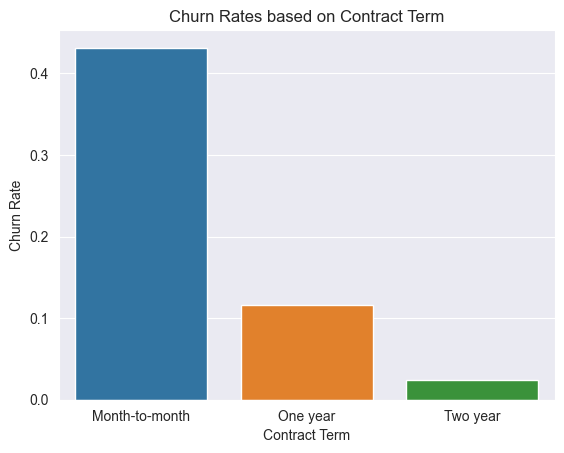

In [141]:
sns.barplot(x=churn_rates_by_contract.index, y=churn_rates_by_contract.values)
plt.title('Churn Rates based on Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Churn Rate')
plt.show()







 Customers on long-term contracts is less likely to churn compared to those on month-to-month contracts

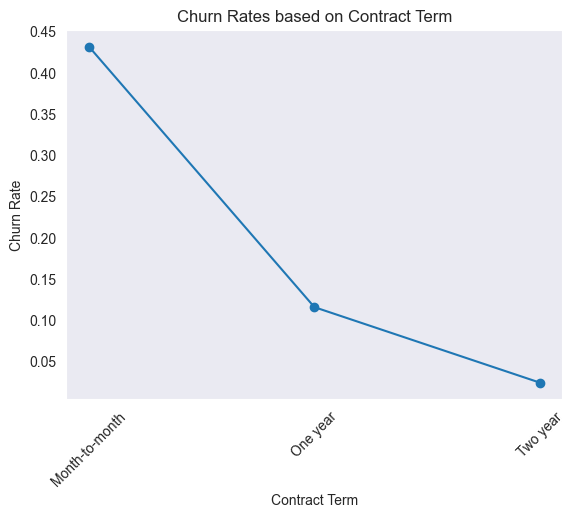

In [142]:
# Sort the data by contract term for a clear line graph
churn_rates_by_contract = churn_rates_by_contract.sort_index()

# Create the line graph
plt.plot(churn_rates_by_contract.index, churn_rates_by_contract.values, marker='o', linestyle='-')
plt.title('Churn Rates based on Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)  # To avoid overlapping of labels (optional)
plt.grid(False)  # Add grid lines (optional)
plt.show()